In [154]:
using Plots
using WAV
using DSP

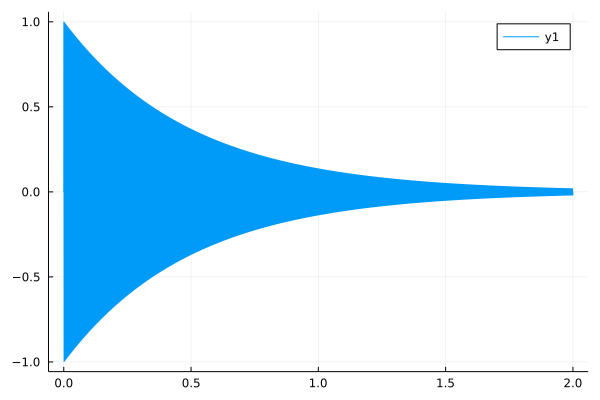

In [177]:
Ω = 2π*500
τ = 0.5
t=0:1/40000:2

x0 = sin.(Ω * t).^3 .* (exp.(-t./τ))
plot(t, x0)

In [178]:
size(x0)

(80001,)

In [180]:
wavplay(x0, 40000)

In [135]:
vx = randn(length(x0), 1)

80001×1 Matrix{Float64}:
  1.1964737864134096
 -0.26737329199426263
 -2.007811821768466
 -1.2647856139527232
 -0.31020717114188195
 -0.33495817625279634
 -0.09090312712054692
 -0.5810153016582164
  0.6896657541817789
  0.2965413400413005
  0.21406872858959652
  0.9284969579876179
  0.19074436785331075
  ⋮
  0.422246096824338
  0.7223539681292718
 -0.8928989931194029
 -0.10090985072689686
  2.0400631425304145
 -0.20326759629700272
 -0.8447843367076272
  0.31139889506802454
  0.45182322447579243
  0.026411686075075463
 -0.20215259423637233
  1.403132005470533

In [136]:
# Cálculo da potência
x02 = x0.^2

P_x0 = sum(x02)/80001

0.03904888633891437

In [137]:
A = sqrt(P_x0/10)
vx = A.*vx

80001×1 Matrix{Float64}:
  0.074766579804407
 -0.01670791855238259
 -0.1254663700192549
 -0.07903532498152718
 -0.019384569457725744
 -0.020931237692231517
 -0.005680455339269899
 -0.03630712800589592
  0.043096597881152374
  0.0185306038605036
  0.01337696392638881
  0.05802094679869898
  0.011919445426460944
  ⋮
  0.02638578199857702
  0.04513925521683453
 -0.05579646172312353
 -0.006305766572654745
  0.12748172628942778
 -0.01270201080271616
 -0.052789819756351955
  0.019459039222998124
  0.028234030326328947
  0.001650442706831494
 -0.012632335318393102
  0.08768046759938147

In [138]:
# Cálculo da potência do ruído

vx2 = vx.^2

P_vx = sum(vx2)/80001
SNR = P_x0/P_vx

10.044043799037288

In [139]:
10*log10(SNR)

10.019085978719016

In [145]:
x = x0 + vx

plot(t, x, label = "x[n] + v[n]")
plot!(t, x0, label = "x[n]")
plot!(t, vx, label = "v[n]")

In [181]:
wavplay(x, 40000)

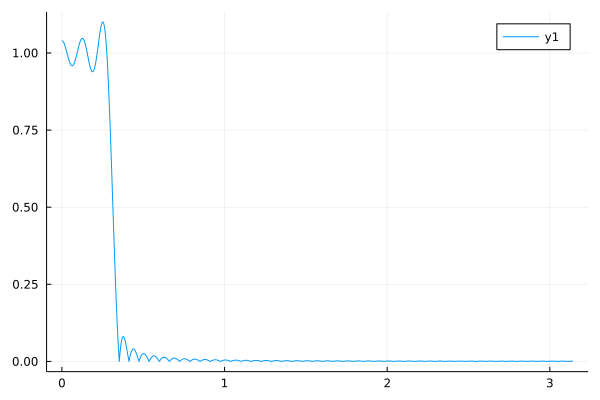

In [162]:
n = 0:100
hn = 0.1*sinc.(0.1*(n.-50))

plot(n, hn) #No tempo

hnf = PolynomialRatio(hn, [1])

ω=range(0,π, length=80001)

H = freqz(hnf, ω)
plot(ω, abs.(H))

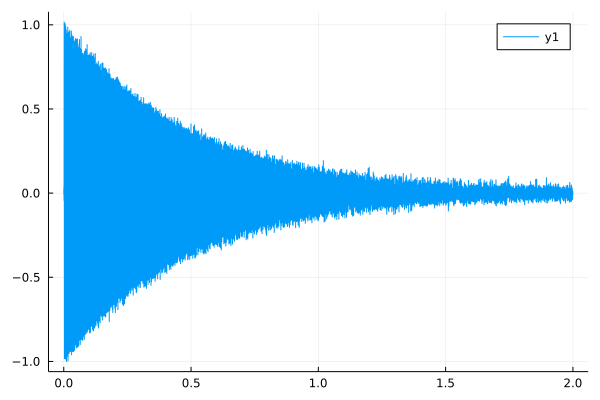

In [164]:
yn = filt(hn, [1], x)

plot(t, yn)

In [182]:
wavplay(yn, 40000)